In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

In [3]:
# needs to be run so that we can access packages directly

notebook_dir = os.getcwd()
project_path = os.path.abspath(os.path.join(notebook_dir, '..'))

if project_path not in sys.path:
    sys.path.append(project_path)

Uncomment below line to install necessary packages for this analysis

`wordcloud`: The wordcloud library in Python is used to generate and visualize word clouds, where the size of each word indicates its frequency or importance in a given text.

`spacy`: spaCy is an advanced Python library designed for fast and efficient natural language processing (NLP), offering features like tokenization, part-of-speech tagging, named entity recognition, dependency parsing, and more, tailored for production use.

In [4]:
# %pip install wordcloud nltk spacy numpy

Processing consulting session reports

In [5]:
from src import TemplateDocumentProcessor
from fsspec.implementations.local import LocalFileSystem
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
fs_raw = LocalFileSystem()
reports = fs_raw.ls('../raw/')
template_proc = TemplateDocumentProcessor()
consultants = template_proc.process(reports)

Not considering dummy template document

In [7]:
consultants = consultants[1:]

Creating one long string from content of all consultants

In [8]:
content = ''.join([consultant.consolidated_content for consultant in consultants])

Uncomment below line if you do not have the model `en_core_web_sm`. This is for removing any names of people to preserve anonymity. 

In [9]:
# download("en_core_web_sm")

Load it...

In [10]:

nlp = spacy.load("en_core_web_sm")

Now we need to process the content. `nlp(content)` creates and object which holds some information about the text (like is this word a person, an organization, etc).

In [11]:
doc = nlp(content)

Identifying all words which are labeled as 'PERSON'

In [12]:
person_names = set()
for ent in doc.ents:
    if ent.label_ == 'PERSON':
        person_names.update(ent.text.split())

Let's remove person names from the string

In [13]:
filtered_tokens = [token.text for token in doc if token.text not in person_names and not token.is_stop]
filtered_text = ' '.join(filtered_tokens)

Now creating a wordcloud...

In [14]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

Plotting...

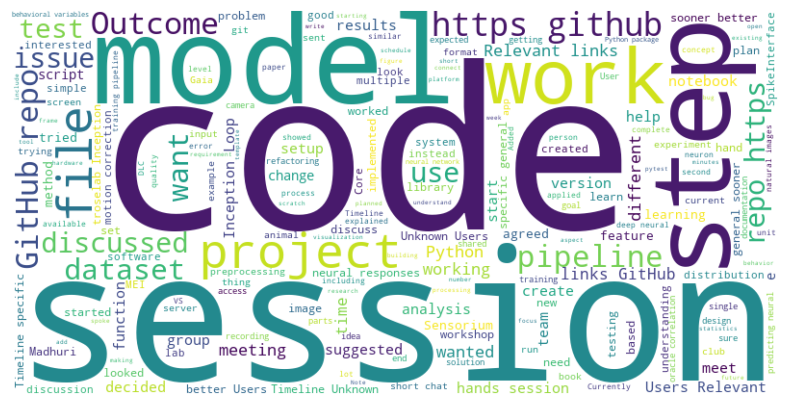

In [15]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');